In [104]:
import pandas as pd
import numpy as np

In [105]:
df = pd.read_csv('/content/NIFTY50 (1).csv')

In [106]:
df.head()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0


In [107]:
# Renaming columns
# df.rename(columns={
#     'Low': 'LOW',
#     'Close': 'CLOSE',
#     'High': 'HIGH',
#     'Open': 'OPEN',
#     'Date': 'DATE',
#     'Volume': 'SHARES_TRADED'
# }, inplace=True)

<Axes: xlabel='DATE'>

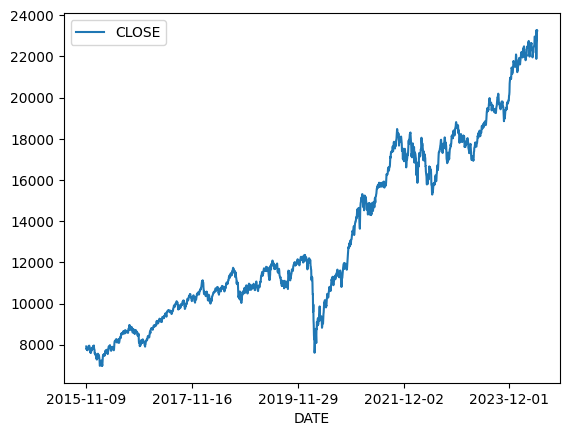

In [108]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(12, 8))
df.plot.line(y='CLOSE', x = 'DATE')

In [109]:
missing_values = df.isna().sum()

In [110]:
missing_values

DATE             0
OPEN             0
HIGH             0
CLOSE            0
LOW              0
SHARES_TRADED    1
dtype: int64

In [111]:
from sklearn.impute import SimpleImputer
# Impute missing values in 'SHARES_TRADED' using SimpleImputer (replace with 'median' or 'most_frequent' as needed)
imputer = SimpleImputer(strategy='mean')
df['SHARES_TRADED'] = imputer.fit_transform(df[['SHARES_TRADED']])

# Use the imputed dataframe for further processing

In [112]:
missing_values = df.isna().sum()
print(missing_values)

DATE             0
OPEN             0
HIGH             0
CLOSE            0
LOW              0
SHARES_TRADED    0
dtype: int64


In [113]:
# target whether the stock price will go up or down

In [114]:
df.head()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0


In [115]:
df['chnage_in_price'] = df['CLOSE'].diff()
# chnage in price from one day to next

In [116]:
df.head()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0,NaN
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0,-131.85
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0,41.65
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0,-62.75
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0,44.35


In [117]:
# indicators
# momentum indicator is just telling you the speed and direction if four out of five is heading in the same direction it means we are heading to that direction
# just like measuring the same thing but measuring from diff perspectives

In [118]:
# RSI index, a momentum indicator : determines whether the stock is overbought(when the demand unjustifiably pushes the price upwards, the condition is generally interpreted as a sign that the stock is overvalued) or oversold(when the price gies down sharply to a level below its true value)
# when the RSI is above 70 it indicates that the stock is overbought and when the RSI is below 30 it might indicate that the stock is oversold
# where RS (Relative Strength) is the average gain of up periods during a specified time frame divided by the average loss of down periods.

In [119]:
df['GAIN'] = df['chnage_in_price'].apply(lambda x: x if x > 0 else 0)
df['LOSS'] = df['chnage_in_price'].apply(lambda x: -x if x < 0 else 0)
# gain -> up days
# loss -> down days

In [120]:
df.head()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0,NaN,0.00,0.00
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0,-131.85,0.00,131.85
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0,41.65,41.65,0.00
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0,-62.75,0.00,62.75
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0,44.35,44.35,0.00


In [121]:
#Calculate the Exponential Weighted Moving Average (EWMA):
#The EWMA gives more weight to recent price changes while decreasing the weight of older changes.
#This makes the indicator more sensitive to recent price movements.
period = 14
ewma_gain = df['GAIN'].rolling(window=period, min_periods=1).mean()
ewma_loss = df['LOSS'].rolling(window=period, min_periods=1).mean()

#ewma_up and ewma_down are the exponentially weighted moving averages of the up and down days, respectively.

# Calculate Relative Strength (RS):
#The Relative Strength (RS) is the ratio of the average gain (ewma_up) to the average loss (ewma_down).
rs = ewma_gain / ewma_loss

# Calculate RSI
df['RSI'] = 100 - (100 / (1 + rs))

# Drop NaN values
#df.dropna(inplace=True)

In [122]:
df

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08,NaN,0.00,0.00,NaN
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08,-131.85,0.00,131.85,0.000000
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07,41.65,41.65,0.00,24.005764
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08,-62.75,0.00,62.75,17.629630
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08,44.35,44.35,0.00,30.648610
...,...,...,...,...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09,-1379.40,0.00,1379.40,45.353231
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08,735.85,735.85,0.00,52.752142
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08,201.05,201.05,0.00,54.362614
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08,468.75,468.75,0.00,58.747600


In [123]:
#The Stochastic Oscillator is a popular momentum indicator used in technical analysis to compare the closing price of a security to its price range over a specific period of time. Here’s a brief overview:
#Calculation: It compares the current closing price of a stock to its price range over a certain time period, typically 14 days. The formula involves calculating the %K and %D lines

n = 14
smoothing_period = 3  # Smoothing period for %D calculation

# Calculate %K
df['Low_14'] = df['LOW'].rolling(window=n).min()
df['High_14'] = df['HIGH'].rolling(window=n).max()
df['%K'] = ((df['CLOSE'] - df['Low_14']) / (df['High_14'] - df['Low_14'])) * 100

# Calculate %D = 3-day moving average of %K
#The %K line oscillates between 0 and 100.
# Readings above 80 are considered overbought, suggesting a potential sell signal.
# Readings below 20 are considered oversold, suggesting a potential buy signal.
# Divergence between the %K and %D lines can indicate potential trend reversals or strength.
df['%D'] = df['%K'].rolling(window=smoothing_period).mean()
df['%K_%D_Divergence'] = df['%K'] - df['%D']


# Drop NaN values
#df.dropna(inplace=True)


In [124]:
df

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI,Low_14,High_14,%K,%D,%K_%D_Divergence
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08,-131.85,0.00,131.85,0.000000,NaN,NaN,NaN,NaN,NaN
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07,41.65,41.65,0.00,24.005764,NaN,NaN,NaN,NaN,NaN
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08,-62.75,0.00,62.75,17.629630,NaN,NaN,NaN,NaN,NaN
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08,44.35,44.35,0.00,30.648610,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09,-1379.40,0.00,1379.40,45.353231,21281.45,23338.7,29.313404,56.189276,-26.875873
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08,735.85,735.85,0.00,52.752142,21281.45,23338.7,65.082027,62.856855,2.225172
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08,201.05,201.05,0.00,54.362614,21281.45,23338.7,74.854782,56.416738,18.438044
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08,468.75,468.75,0.00,58.747600,21281.45,23338.7,97.640053,79.192287,18.447766


In [125]:
#Indicator Calculation: Williams %R
#Williams %R ranges from -100 to 0. When its value is above -20, it indicates a sell signal and when its value is below -80, it indicates a buy signal.

n = 14  # Number of periods for %R calculation#

# Calculate %R
# Group by symbol, then apply the rolling function and grab the Min and Max
df['Lowest_Low'] = df['LOW'].rolling(window=n).min()
df['Highest_High'] = df['HIGH'].rolling(window=n).max()
# Calculate William %R indicator.
df['Williams_%R'] = ((df['Highest_High'] - df['CLOSE']) / (df['Highest_High'] - df['Lowest_Low'])) * -100



In [126]:
df

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI,Low_14,High_14,%K,%D,%K_%D_Divergence,Lowest_Low,Highest_High,Williams_%R
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08,-131.85,0.00,131.85,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07,41.65,41.65,0.00,24.005764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08,-62.75,0.00,62.75,17.629630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08,44.35,44.35,0.00,30.648610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09,-1379.40,0.00,1379.40,45.353231,21281.45,23338.7,29.313404,56.189276,-26.875873,21281.45,23338.7,-70.686596
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08,735.85,735.85,0.00,52.752142,21281.45,23338.7,65.082027,62.856855,2.225172,21281.45,23338.7,-34.917973
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08,201.05,201.05,0.00,54.362614,21281.45,23338.7,74.854782,56.416738,18.438044,21281.45,23338.7,-25.145218
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08,468.75,468.75,0.00,58.747600,21281.45,23338.7,97.640053,79.192287,18.447766,21281.45,23338.7,-2.359947


In [127]:
import pandas as pd

# Sample DataFrame

# Define periods
short_period = 12  # Short-term EMA period
long_period = 26   # Long-term EMA period
signal_period = 9  # Signal line EMA period

# Calculate Short-term and Long-term EMAs
#The ewm method is used to calculate the Exponential Moving Averages (EMAs). The span parameter defines the period, and adjust=False ensures that the calculation is consistent with standard EMA formula
EMA_short = df['CLOSE'].ewm(span=short_period, min_periods=short_period, adjust=False).mean()
EMA_long = df['CLOSE'].ewm(span=long_period, min_periods=long_period, adjust=False).mean()

# Calculate MACD Line
df['MACD'] = EMA_short - EMA_long

# Calculate Signal Line
df['MACD_EMA'] = df['MACD'].ewm(span=signal_period, min_periods=signal_period, adjust=False).mean()

# Calculate MACD Histogram
df['MACD_Histogram'] = df['MACD'] - df['MACD_EMA']


# print(df[['DATE', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']])


In [128]:
df

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI,...,High_14,%K,%D,%K_%D_Divergence,Lowest_Low,Highest_High,Williams_%R,MACD,MACD_EMA,MACD_Histogram
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08,NaN,0.00,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08,-131.85,0.00,131.85,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07,41.65,41.65,0.00,24.005764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08,-62.75,0.00,62.75,17.629630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08,44.35,44.35,0.00,30.648610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09,-1379.40,0.00,1379.40,45.353231,...,23338.7,29.313404,56.189276,-26.875873,21281.45,23338.7,-70.686596,61.695480,93.387835,-31.692356
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08,735.85,735.85,0.00,52.752142,...,23338.7,65.082027,62.856855,2.225172,21281.45,23338.7,-34.917973,59.332756,86.576820,-27.244064
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08,201.05,201.05,0.00,54.362614,...,23338.7,74.854782,56.416738,18.438044,21281.45,23338.7,-25.145218,72.843639,83.830183,-10.986545
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08,468.75,468.75,0.00,58.747600,...,23338.7,97.640053,79.192287,18.447766,21281.45,23338.7,-2.359947,119.992124,91.062572,28.929552


In [129]:
# Calculate the Price Rate of Change
n = 9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
df['Price_Rate_Of_Change'] = df['CLOSE'].transform(lambda x: x.pct_change(periods = n))


In [130]:
df.head(30)

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI,...,%K,%D,%K_%D_Divergence,Lowest_Low,Highest_High,Williams_%R,MACD,MACD_EMA,MACD_Histogram,Price_Rate_Of_Change
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0,NaN,0.00,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0,-131.85,0.00,131.85,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0,41.65,41.65,0.00,24.005764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0,-62.75,0.00,62.75,17.629630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0,44.35,44.35,0.00,30.648610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-11-17,7848.75,7860.45,7837.55,7793.00,149451211.0,30.95,30.95,0.00,37.538116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-11-18,7823.15,7843.40,7731.80,7725.05,148037721.0,-105.75,0.00,105.75,28.025401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-11-19,7788.50,7854.90,7842.75,7765.45,136702518.0,110.95,110.95,0.00,43.142451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-11-20,7841.90,7906.95,7856.55,7817.80,156610433.0,13.80,13.80,0.00,44.589982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-11-23,7869.50,7877.50,7849.25,7825.20,130871603.0,-7.30,0.00,7.30,43.997452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008332


In [131]:
# Indicator Calculation: On Balance Volume

def obv(data):
    volume = data['SHARES_TRADED']
    change = data['CLOSE'].diff()

    prev_obv = 0
    obv_values = []

    for i, j in zip(change, volume):
        if i > 0:
            current_obv = prev_obv + j
        elif i < 0:
            current_obv = prev_obv - j
        else:
            current_obv = prev_obv

        prev_obv = current_obv
        obv_values.append(current_obv)

    return pd.Series(obv_values, index=data.index)

# Apply the OBV function to the entire dataset
df['On Balance Volume'] = obv(df)

# Display the data frame
# print(df.head(30))

In [132]:
df

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI,...,%D,%K_%D_Divergence,Lowest_Low,Highest_High,Williams_%R,MACD,MACD_EMA,MACD_Histogram,Price_Rate_Of_Change,On Balance Volume
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08,NaN,0.00,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08,-131.85,0.00,131.85,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.702674e+08
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07,41.65,41.65,0.00,24.005764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.478870e+08
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08,-62.75,0.00,62.75,17.629630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.137638e+08
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08,44.35,44.35,0.00,30.648610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.596289e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09,-1379.40,0.00,1379.40,45.353231,...,56.189276,-26.875873,21281.45,23338.7,-70.686596,61.695480,93.387835,-31.692356,-0.031565,6.769225e+10
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08,735.85,735.85,0.00,52.752142,...,62.856855,2.225172,21281.45,23338.7,-34.917973,59.332756,86.576820,-27.244064,-0.015121,6.833074e+10
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08,201.05,201.05,0.00,54.362614,...,56.416738,18.438044,21281.45,23338.7,-25.145218,72.843639,83.830183,-10.986545,-0.005911,6.881115e+10
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08,468.75,468.75,0.00,58.747600,...,79.192287,18.447766,21281.45,23338.7,-2.359947,119.992124,91.062572,28.929552,0.015598,6.928471e+10


In [133]:
closed = df['CLOSE']
closed = closed.transform(lambda x: x.shift(1) < x)
df['PREDICTIONS'] = closed*1
df.head(30)

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI,...,%K_%D_Divergence,Lowest_Low,Highest_High,Williams_%R,MACD,MACD_EMA,MACD_Histogram,Price_Rate_Of_Change,On Balance Volume,PREDICTIONS
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0,NaN,0.00,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0,-131.85,0.00,131.85,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-170267413.0,0
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0,41.65,41.65,0.00,24.005764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-147886978.0,1
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0,-62.75,0.00,62.75,17.629630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-313763797.0,0
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0,44.35,44.35,0.00,30.648610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-159628912.0,1
5,2015-11-17,7848.75,7860.45,7837.55,7793.00,149451211.0,30.95,30.95,0.00,37.538116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10177701.0,1
6,2015-11-18,7823.15,7843.40,7731.80,7725.05,148037721.0,-105.75,0.00,105.75,28.025401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-158215422.0,0
7,2015-11-19,7788.50,7854.90,7842.75,7765.45,136702518.0,110.95,110.95,0.00,43.142451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21512904.0,1
8,2015-11-20,7841.90,7906.95,7856.55,7817.80,156610433.0,13.80,13.80,0.00,44.589982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135097529.0,1
9,2015-11-23,7869.50,7877.50,7849.25,7825.20,130871603.0,-7.30,0.00,7.30,43.997452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008332,4225926.0,0


In [134]:
# we need to remove all rows that have an NaN value
print('Before NaN Drop we have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

#Any row that has a NaN value will be dropped
df=df.dropna()

#Display how umuch we have left row
print('After NaN Drop we have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

#print the head
df.head(5)

Before NaN Drop we have 2132 rows and 24 columns
After NaN Drop we have 2099 rows and 24 columns


,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI,...,%K_%D_Divergence,Lowest_Low,Highest_High,Williams_%R,MACD,MACD_EMA,MACD_Histogram,Price_Rate_Of_Change,On Balance Volume,PREDICTIONS
33,2015-12-29,7929.20,7942.15,7928.95,7902.75,116535971.0,3.80,3.80,0.0,63.812071,...,1.524301,7551.05,7942.15,-3.375096,12.771598,-15.159480,27.931078,0.029613,4698928.0,1
34,2015-12-30,7938.60,7944.75,7896.25,7889.85,110145855.0,-32.70,0.00,32.7,68.517914,...,-6.047468,7551.05,7944.75,-12.319025,16.858258,-8.755933,25.614190,0.018753,-105446927.0,0
35,2015-12-31,7897.80,7955.55,7946.35,7891.15,155645098.0,50.10,50.10,0.0,67.643705,...,3.715098,7551.05,7955.55,-2.274413,23.864521,-2.231842,26.096363,0.013003,50198171.0,1
36,2016-01-01,7938.45,7972.55,7963.20,7909.80,64843836.0,16.85,16.85,0.0,75.581986,...,3.385634,7551.05,7972.55,-2.218268,30.425958,4.299718,26.126240,0.025928,115042007.0,1
37,2016-01-04,7924.55,7937.55,7791.30,7781.10,138864905.0,-171.90,0.00,171.9,58.594463,...,-33.279626,7625.10,7972.55,-52.165779,21.507130,7.741201,13.765929,-0.005508,-23822898.0,0


In [135]:
df.columns

Index(['DATE', 'OPEN', 'HIGH', 'CLOSE', 'LOW', 'SHARES_TRADED',
       'chnage_in_price', 'GAIN', 'LOSS', 'RSI', 'Low_14', 'High_14', '%K',
       '%D', '%K_%D_Divergence', 'Lowest_Low', 'Highest_High', 'Williams_%R',
       'MACD', 'MACD_EMA', 'MACD_Histogram', 'Price_Rate_Of_Change',
       'On Balance Volume', 'PREDICTIONS'],
      dtype='object')

In [136]:
# correleation
df1 = df[['OPEN', 'HIGH', 'CLOSE', 'LOW', 'SHARES_TRADED',
       'chnage_in_price', 'GAIN', 'LOSS', 'RSI', 'Low_14', 'High_14', '%K',
       '%D', '%K_%D_Divergence', 'Lowest_Low', 'Highest_High', 'Williams_%R',
       'MACD', 'MACD_EMA', 'MACD_Histogram', 'Price_Rate_Of_Change',
       'On Balance Volume', 'PREDICTIONS']]

In [137]:
df1.corr()

,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED,chnage_in_price,GAIN,LOSS,RSI,Low_14,...,%K_%D_Divergence,Lowest_Low,Highest_High,Williams_%R,MACD,MACD_EMA,MACD_Histogram,Price_Rate_Of_Change,On Balance Volume,PREDICTIONS
OPEN,1.000000,0.999863,0.999656,0.999780,-0.037522,0.022855,0.153189,0.101785,0.073595,0.997517,...,-0.011045,0.997517,0.996945,0.040722,0.240492,0.255614,-0.002960,0.055789,0.967749,0.003112
HIGH,0.999863,1.000000,0.999832,0.999721,-0.033413,0.030898,0.163814,0.098981,0.071962,0.997428,...,-0.004487,0.997428,0.997415,0.041288,0.236578,0.252160,-0.005172,0.054003,0.968517,0.008612
CLOSE,0.999656,0.999832,1.000000,0.999840,-0.038749,0.043859,0.169875,0.084590,0.077989,0.997346,...,0.004539,0.997346,0.996773,0.049561,0.241255,0.255526,-0.000092,0.060977,0.967896,0.018145
LOW,0.999780,0.999721,0.999840,1.000000,-0.044102,0.035636,0.158416,0.086926,0.079345,0.997509,...,-0.002345,0.997509,0.996309,0.048832,0.244844,0.258682,0.001978,0.062706,0.966984,0.011899
SHARES_TRADED,-0.037522,-0.033413,-0.038749,-0.044102,1.000000,-0.039984,0.160077,0.203924,-0.050146,-0.057599,...,-0.003518,-0.057599,-0.017158,-0.038805,-0.051347,-0.037215,-0.054995,-0.061911,0.044939,-0.006166
chnage_in_price,0.022855,0.030898,0.043859,0.035636,-0.039984,1.000000,0.781208,-0.830466,0.233494,0.018178,...,0.684017,0.018178,0.015472,0.415861,0.075609,0.019074,0.195460,0.317420,0.036562,0.678636
GAIN,0.153189,0.163814,0.169875,0.158416,0.160077,0.781208,1.000000,-0.301005,0.064972,0.145975,...,0.579747,0.145975,0.167826,0.225403,-0.085619,-0.099798,0.029235,0.101969,0.190010,0.571572
LOSS,0.101785,0.098981,0.084590,0.086926,0.203924,-0.830466,-0.301005,1.000000,-0.298702,0.102493,...,-0.527551,0.102493,0.126125,-0.434122,-0.191902,-0.118191,-0.272493,-0.393892,0.113705,-0.526627
RSI,0.073595,0.071962,0.077989,0.079345,-0.050146,0.233494,0.064972,-0.298702,1.000000,0.035783,...,0.028382,0.035783,0.024102,0.813383,0.676250,0.507587,0.668377,0.690082,0.067787,0.239701
Low_14,0.997517,0.997428,0.997346,0.997509,-0.057599,0.018178,0.145975,0.102493,0.035783,1.000000,...,-0.012331,1.000000,0.995927,-0.000131,0.223783,0.252468,-0.049584,0.017035,0.961130,-0.002124


<Axes: >

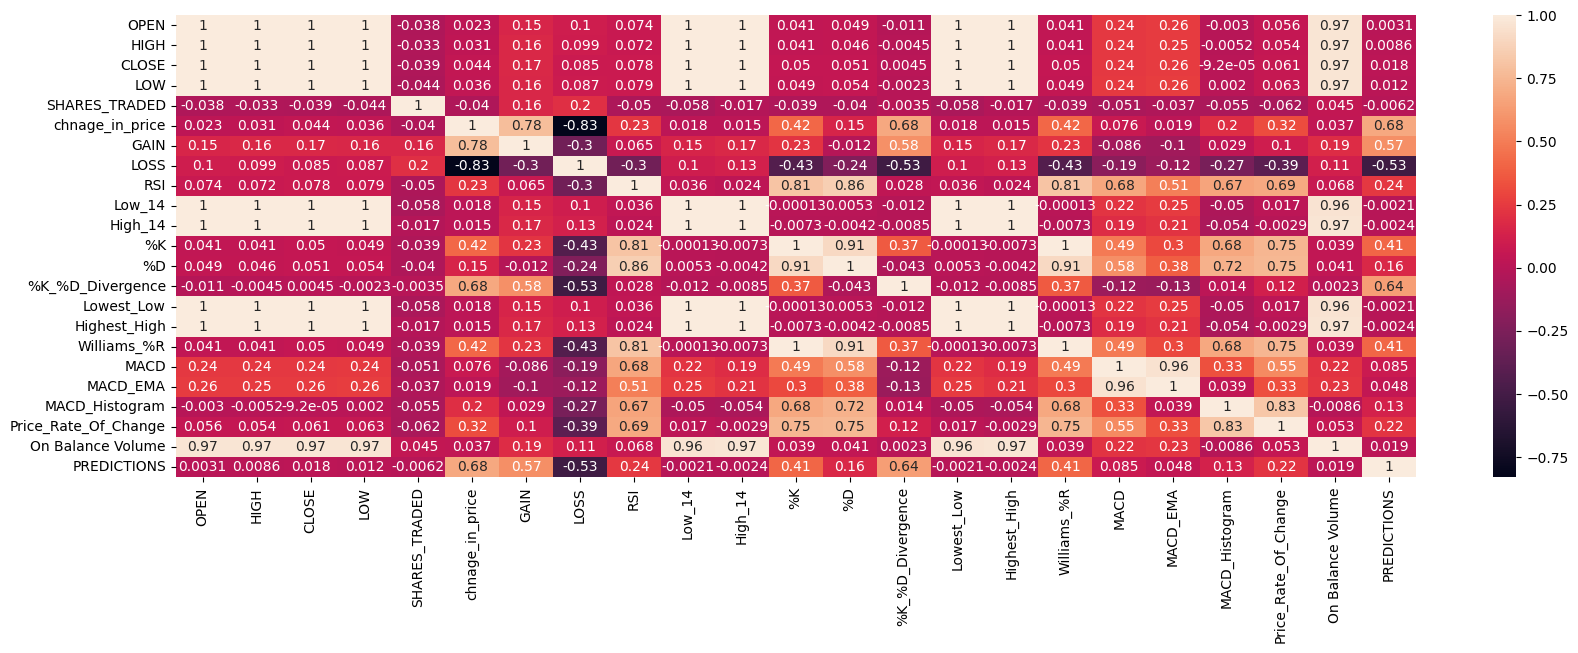

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df1.corr(), annot=True)

In [139]:
df.columns

Index(['DATE', 'OPEN', 'HIGH', 'CLOSE', 'LOW', 'SHARES_TRADED',
       'chnage_in_price', 'GAIN', 'LOSS', 'RSI', 'Low_14', 'High_14', '%K',
       '%D', '%K_%D_Divergence', 'Lowest_Low', 'Highest_High', 'Williams_%R',
       'MACD', 'MACD_EMA', 'MACD_Histogram', 'Price_Rate_Of_Change',
       'On Balance Volume', 'PREDICTIONS'],
      dtype='object')

In [140]:
X_cols = df[['RSI' , '%K', '%K_%D_Divergence','MACD','Williams_%R', 'MACD_EMA', 'Price_Rate_Of_Change', 'On Balance Volume', 'MACD_Histogram']]
Y_cols = df['PREDICTIONS']

In [141]:
df2=df[['RSI' , '%K', '%K_%D_Divergence','MACD','Williams_%R', 'MACD_EMA', 'Price_Rate_Of_Change', 'On Balance Volume', 'MACD_Histogram','PREDICTIONS']]

<Axes: >

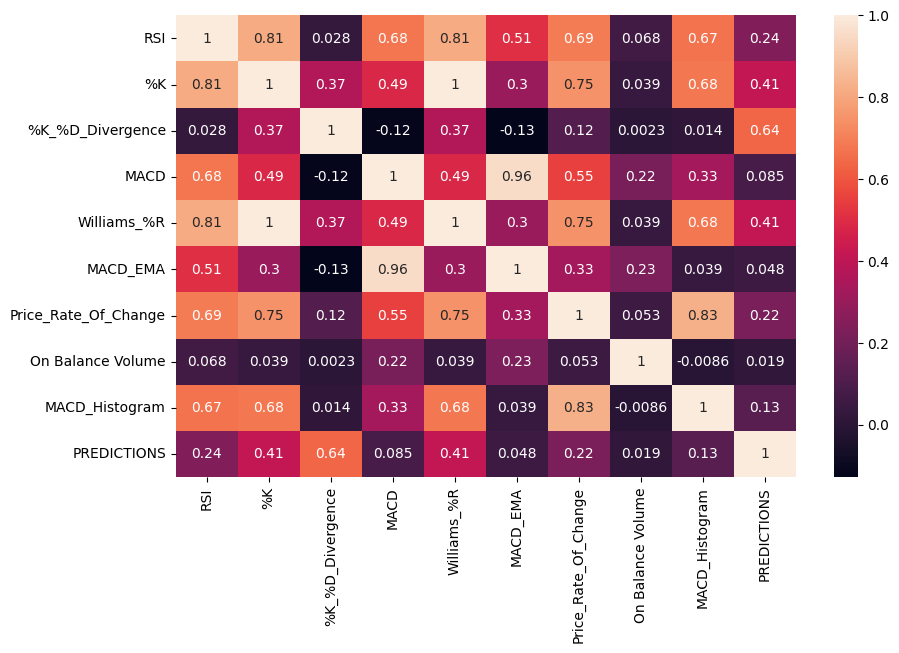

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True)

In [143]:
X_cols

,RSI,%K,%K_%D_Divergence,MACD,Williams_%R,MACD_EMA,Price_Rate_Of_Change,On Balance Volume,MACD_Histogram
33,63.812071,96.624904,1.524301,12.771598,-3.375096,-15.159480,0.029613,4.698928e+06,27.931078
34,68.517914,87.680975,-6.047468,16.858258,-12.319025,-8.755933,0.018753,-1.054469e+08,25.614190
35,67.643705,97.725587,3.715098,23.864521,-2.274413,-2.231842,0.013003,5.019817e+07,26.096363
36,75.581986,97.781732,3.385634,30.425958,-2.218268,4.299718,0.025928,1.150420e+08,26.126240
37,58.594463,47.834221,-33.279626,21.507130,-52.165779,7.741201,-0.005508,-2.382290e+07,13.765929
...,...,...,...,...,...,...,...,...,...
2127,45.353231,29.313404,-26.875873,61.695480,-70.686596,93.387835,-0.031565,6.769225e+10,-31.692356
2128,52.752142,65.082027,2.225172,59.332756,-34.917973,86.576820,-0.015121,6.833074e+10,-27.244064
2129,54.362614,74.854782,18.438044,72.843639,-25.145218,83.830183,-0.005911,6.881115e+10,-10.986545
2130,58.747600,97.640053,18.447766,119.992124,-2.359947,91.062572,0.015598,6.928471e+10,28.929552


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X_cols, Y_cols, random_state=0)

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score


# Assuming you have already trained the model and made predictions
# Create the Random Forest classifier
random_frst_clsf = RandomForestClassifier(bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300)

# Fit the data to the model
random_frst_clsf.fit(X_train, Y_train)

# Make predictions
y_pred = random_frst_clsf.predict(X_test)

# Calculate balanced accuracy
bal_acc = balanced_accuracy_score(Y_test, y_pred)
print(f"Balanced Accuracy:", bal_acc*100.0)


Balanced Accuracy: 83.06628141143509


GRID SEARCH

In [146]:
# #grid search
# # Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
# # Best balanced accuracy score from Grid Search: 85.3080881510705


# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=random_frst_clsf, param_grid=param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train, Y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(f"Best parameters found: {best_params}")
# print(f"Best balanced accuracy score from Grid Search: {best_score * 100.0}")


RandomizedSearchCV


In [147]:
# Best parameters found: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
# Best balanced accuracy score from Random Search: 85.35343979903948


# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter grid
# param_dist = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(estimator=random_frst_clsf, param_distributions=param_dist, n_iter=100, cv=5, scoring='balanced_accuracy', n_jobs=-1, random_state=42)

# # Fit the random search to the data
# random_search.fit(X_train, Y_train)

# # Get the best parameters and the best score
# best_params_random = random_search.best_params_
# best_score_random = random_search.best_score_
# print(f"Best parameters found: {best_params_random}")
# print(f"Best balanced accuracy score from Random Search: {best_score_random * 100.0}")


In [148]:
from sklearn.metrics import accuracy_score

# Print the accuracy of the model
print('Correct Prediction (%):', accuracy_score(Y_test, y_pred, normalize=True) * 100.0)


Correct Prediction (%): 83.42857142857143


In [149]:
#Model Evaluation : Classification report , look at different matrix to better understand how our model performed
#recall is the ability of the classifier to correctly identify positive labels
# specificity: measures the classifier's ability to correctly identify negative labels
# precision : measures the proportion of all correctly identified samples in a population of samples which are classified as positive labels
# f-score helps to measure the recall and precision at the same time , it uses the harmonic mean in the place of arithmatic mean by punishing the extreme values more so it allows us to look at two models in comparison

In [150]:

from sklearn.metrics import classification_report

target_names =['GAIN', 'LOSS']

#Build a classification report
report= classification_report(y_true= Y_test, y_pred = y_pred, target_names=target_names, output_dict=True)

# Add it to a data frame, transpose it for readability
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
GAIN,0.848214,0.781893,0.813704,243.000000
LOSS,0.823920,0.879433,0.850772,282.000000
accuracy,0.834286,0.834286,0.834286,0.834286
macro avg,0.836067,0.830663,0.832238,525.000000
weighted avg,0.835165,0.834286,0.833615,525.000000


#Model Evaluation: Confusion Matrix

Accuracy: 0.8342857142857143
Precision: 0.8239202657807309
Recall: 0.8794326241134752
Specificity: 0.7818930041152263


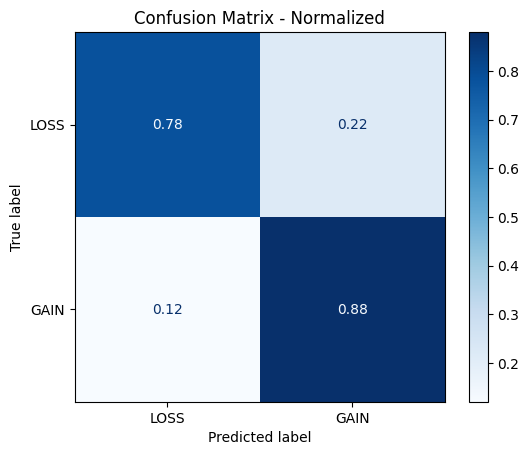

In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
rf_matrix = confusion_matrix(Y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Precision: {}'.format(float(precision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

# Assuming rand_frst_clf and X_test are defined
disp = ConfusionMatrixDisplay.from_estimator(random_frst_clsf, X_test, Y_test, display_labels=['LOSS', 'GAIN'], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()


In [152]:
# Calculate feature importance and store in pandas series
feature_imp = pd.Series(random_frst_clsf.feature_importances_, index=X_cols.columns).sort_values(ascending=False)
feature_imp

%K_%D_Divergence        0.559128
%K                      0.118108
Williams_%R             0.109996
RSI                     0.047401
Price_Rate_Of_Change    0.039500
MACD_Histogram          0.038635
MACD                    0.030153
MACD_EMA                0.028719
On Balance Volume       0.028361
dtype: float64

In [153]:
df['PREDICTIONS'].value_counts()

PREDICTIONS
1    1149
0     950
Name: count, dtype: int64

Text(0.5, 1.0, 'Random Forest: Feature Importance Graph')

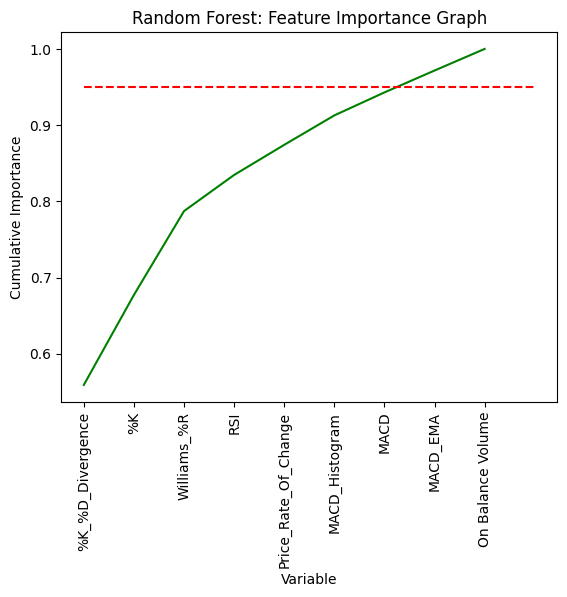

In [154]:
# store the values in a list to plot.
x_values = list(range(len(random_frst_clsf.feature_importances_)))

# Cumulative importances
cumulative_importances = np.cumsum(feature_imp.values)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin = 0, xmax = len(feature_imp), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, feature_imp.index, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Random Forest: Feature Importance Graph')

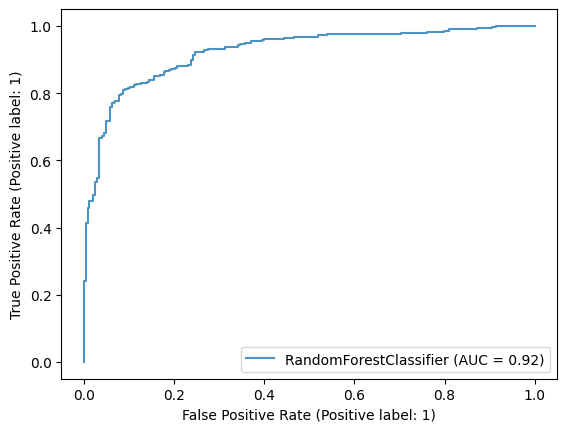

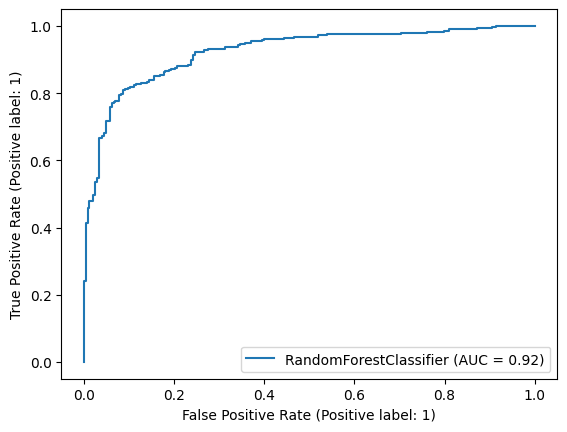

In [155]:
 #Create an ROC Curve plot.
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming random_frst_clsf, X_test, and y_test are defined
rfc_disp = RocCurveDisplay.from_estimator(random_frst_clsf, X_test, Y_test, alpha=0.8)
rfc_disp.plot()
plt.show()


In [157]:
y_pred_test = random_frst_clsf.predict(X_test)


In [160]:
accuracy_test = accuracy_score(Y_test, y_pred_test)
balanced_accuracy_test = balanced_accuracy_score(Y_test, y_pred_test)


In [163]:
print(f"Test Accuracy: {accuracy_test * 100.0:.2f}%")
print(f"Test Balanced Accuracy: {balanced_accuracy_test * 100.0:.2f}%")
# print(f"OOB Score: {random_frst_clsf.oob_score_ * 100.0:.2f}%")


Test Accuracy: 83.43%
Test Balanced Accuracy: 83.07%
